# 0. Import all the toolbox needed for preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Read file & data wrangling 

## 1.1 Read train set

In [2]:
df = pd.read_csv('data/train.csv', index_col=False)
pd.set_option('display.max_columns', None)
df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
# Name the column into a more readable way

df.columns=['receiver_code','bank_no', 'card_no','money_spent', 'transaction_category', 'currency', 'online_transaction','transaction_type','fallback_mark', '3ds_mark', 'fraud', 'payment_type', 'term_mark', 'terms', 'date', "time", 'mcc', 'merchandise_code', 'over_limit', 'city', 'country', 'situation_code', 'transaction_no']

In [4]:
df.head()

,receiver_code,bank_no,card_no,money_spent,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,fraud,payment_type,term_mark,terms,date,time,mcc,merchandise_code,over_limit,city,country,situation_code,transaction_no
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
df.columns

Index(['receiver_code', 'bank_no', 'card_no', 'money_spent',
       'transaction_category', 'currency', 'online_transaction',
       'transaction_type', 'fallback_mark', '3ds_mark', 'fraud',
       'payment_type', 'term_mark', 'terms', 'date', 'time', 'mcc',
       'merchandise_code', 'over_limit', 'city', 'country', 'situation_code',
       'transaction_no'],
      dtype='object')

In [6]:
## Turn money_spent column into float

df['money_spent']=df['money_spent'].apply(float)

In [7]:
## cleaning data

def clean_inf_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
df = clean_inf_nan(df)
# Replaceing data
df=df.replace({"Y":1,"N":0})
df=df.replace(np.NaN,0)
# Give index
num = np.arange(len(df))
df['num_index'] = num

# df.info()

In [8]:
# Turn the time column into readable variables

# First turn the time column into string

def time_to_str(data):
    data['time'] = data['time'].apply(str)
    data['time'] = data['time'].apply(lambda x:x.zfill(8))
    data['hr'] = data['time'].str[:2]
    data['date'] = data['date'].apply(float)
    return data

ts = time_to_str(df)
# ts

In [9]:
# Turn the time column into readable variables

def convert_time(data):
    hr = data['time'].str[:2]
    mint=data['time'].str[2:4]
    secd=data['time'].str[4:6]
    data['time']=hr+mint+secd
    data['time1']=pd.to_datetime(data['time'], format='%H%M%S').dt.time
    return (data)


# Write a function to just drop the date
# strf time

data = convert_time(ts)
data.head()

,receiver_code,bank_no,card_no,money_spent,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,fraud,payment_type,term_mark,terms,date,time,mcc,merchandise_code,over_limit,city,country,situation_code,transaction_no,num_index,hr,time1
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,0,5,0,0,33.0,172652,457,59333,0,0,102,0,516056,0,17,17:26:52
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,0,0,0,0,9.0,105114,451,0,0,5817,102,0,4376,1,10,10:51:14
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,0,5,0,0,6.0,152458,457,59333,0,0,102,0,483434,2,15,15:24:58
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,0,5,0,0,5.0,172946,247,50436,0,3281,102,0,1407164,3,17,17:29:46
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,0,5,0,0,6.0,182129,263,93775,0,5817,102,0,1051004,4,18,18:21:29


In [10]:
data.to_csv('data/train1.csv', index=False)

In [11]:
data = pd.read_csv('data/train1.csv', index_col=False)

In [159]:
# data.info()

## 1.2 Combine trian and test set into a set call all, and organized it as same as train set.

In [136]:
df_test = pd.read_csv('data/test.csv', index_col=False)
df_train = pd.read_csv('data/train.csv', index_col=False)

In [137]:
df_train_1 = df_train.drop('fraud_ind', axis=1)

In [138]:
df_all = df_train_1.append(df_test)
df_all.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [140]:
df_all.columns=['receiver_code','bank_no', 'card_no','money_spent', 'transaction_category', 'currency', 'online_transaction','transaction_type','fallback_mark', '3ds_mark', 'payment_type', 'term_mark', 'terms', 'date', "time", 'mcc', 'merchandise_code', 'over_limit', 'city', 'country', 'situation_code', 'transaction_no']

In [142]:
df_all['money_spent']=df_all['money_spent'].apply(float)

In [143]:
def clean_inf_nan(df_all):
    return df_all.replace([np.inf, -np.inf], np.nan)   

# Cleaning infinite values to NaN
df_all = clean_inf_nan(df_all)
# Replaceing data
df_all=df_all.replace({"Y":1,"N":0})
df_all=df_all.replace(np.NaN,0)
# Give index
num = np.arange(len(df_all))
df_all['num_index'] = num

In [145]:
def time_to_str(data):
    data['time'] = data['time'].apply(str)
    data['time'] = data['time'].apply(lambda x:x.zfill(8))
    data['hr'] = data['time'].str[:2]
    data['date'] = data['date'].apply(float)
    return data

ts = time_to_str(df_all)

In [146]:
def convert_time(data):
    hr = data['time'].str[:2]
    mint=data['time'].str[2:4]
    secd=data['time'].str[4:6]
    data['time']=hr+mint+secd
    data['time1']=pd.to_datetime(data['time'], format='%H%M%S').dt.time
    return (data)


# Write a function to just drop the date
# strf time

data_all = convert_time(df_all)

In [148]:
data_all.to_csv('data/all.csv', index=False)

In [149]:
data_all = pd.read_csv('data/all.csv', index_col=False)

In [158]:
# data_all.info()

# 2. Looking for hidden variables

## 2.1.1 Found that certain mcc did seems to been report as fraud

Every business that applies to accept credit cards is assigned a four-digit number by the credit card networks (Visa, MasterCard, Discover, American Express) called a merchant category code, or MCC. The number denotes the type of business or service it is in. Merchant category codes are used by credit card networks to categorize, track or restrict certain types of purchases.

In [11]:
c = data[data.bank_no==36103]
pd.set_option('display.max_rows', None)

In [12]:
c.groupby(['bank_no', 'date', 'time1', 'hr', 'money_spent', 'mcc', 'merchandise_code','city','fraud']).size().to_frame(name='count').reset_index()
c.head()

,receiver_code,bank_no,card_no,money_spent,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,fraud,payment_type,term_mark,terms,date,time,mcc,merchandise_code,over_limit,city,country,situation_code,transaction_no,num_index,hr,time1
17181,3348,36103,100698,504.76,5,62,1,8,0.0,0.0,1,5,0,0,48.0,072021,289,54828,0,3460,46,0,719340,17181,07,07:20:21
24546,3348,36103,100698,205.92,5,62,1,8,0.0,0.0,1,5,0,0,61.0,152052,289,54828,0,3460,46,0,740694,24546,15,15:20:52
40075,3207,36103,100698,578.02,5,62,1,8,0.0,0.0,1,5,0,0,7.0,210307,218,12011,0,5324,104,0,652163,40075,21,21:03:07
40663,3348,36103,100698,254.99,5,62,1,8,0.0,0.0,1,5,0,0,10.0,174244,289,54828,0,3460,46,0,656405,40663,17,17:42:44
41933,3207,36103,100698,578.02,5,62,1,8,0.0,0.0,1,5,0,0,9.0,185037,218,12011,0,5324,104,0,655071,41933,18,18:50:37


In [13]:
data.fraud.sum()

20355

In [14]:
data[data.fraud==1].mcc.value_counts()[:5]

289    3789
380    3403
288    2631
192    2623
203     490
Name: mcc, dtype: int64

In [15]:
z = data[data.fraud==1].mcc.value_counts()

In [16]:
x = data.mcc.value_counts()

In [17]:
len(data.mcc.unique())

434

In [18]:
(z/x).sort_values(ascending=False)[:5]

403    1.0
121    1.0
25     1.0
236    1.0
439    1.0
Name: mcc, dtype: float64

In [19]:
mcc_list = (z/x).sort_values(ascending=False).index
mcc_list[20:40]

Int64Index([360,  72, 235, 345, 213,  61, 320, 216,  43,  63,  17, 424, 408,
            298, 246,  15, 332,  21,  29, 366],
           dtype='int64')

In [21]:
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

/Users/justin/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [22]:
mcclist1 = []
mcclist2 = []
mcclist3 = []
mcclist4 = []

a_list1 = mcc_list[:20]
a_list2 = mcc_list[20:40]
a_list3 = mcc_list[40:60]
a_list4 = mcc_list[60:80]

for i in tqdm(range(0, len(data))):
    if data.mcc.iloc[i] in a_list1:
        mcclist1.append(i)
    if data.mcc.iloc[i] in a_list2:
        mcclist2.append(i)
    if data.mcc.iloc[i] in a_list3:
        mcclist3.append(i)
    if data.mcc.iloc[i] in a_list4:
        mcclist4.append(i)

In [23]:
mcc1 = data.iloc[mcclist1]
mcc2 = data.iloc[mcclist2]
mcc3 = data.iloc[mcclist3]
mcc4 = data.iloc[mcclist4]

In [24]:
data_plot1 = mcc1.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot2 = mcc2.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot3 = mcc3.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)
data_plot4 = mcc4.groupby(['fraud', 'mcc']).size().reset_index().pivot(columns='fraud', index='mcc', values=0)

With more than 7000 transaction, mcc=288 have a fraud rate around 34%

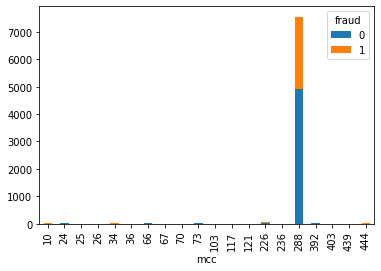

In [25]:
data_plot1.plot(kind='bar', stacked=True);

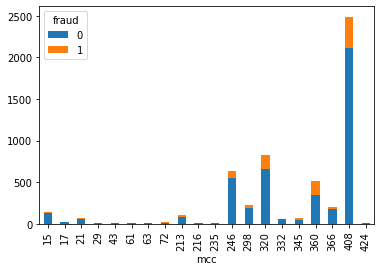

In [26]:
data_plot2.plot(kind='bar', stacked=True);

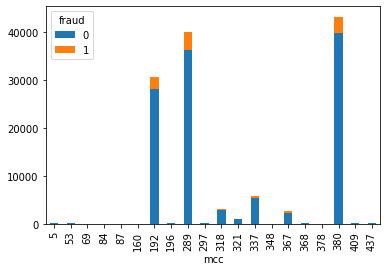

In [27]:
data_plot3.plot(kind='bar', stacked=True);

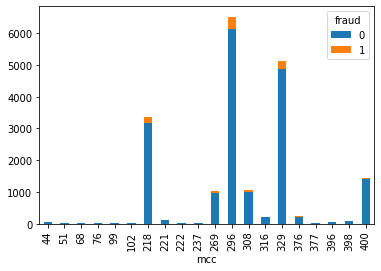

In [28]:
data_plot4.plot(kind='bar', stacked=True);

In [29]:
data.columns

Index(['receiver_code', 'bank_no', 'card_no', 'money_spent',
       'transaction_category', 'currency', 'online_transaction',
       'transaction_type', 'fallback_mark', '3ds_mark', 'fraud',
       'payment_type', 'term_mark', 'terms', 'date', 'time', 'mcc',
       'merchandise_code', 'over_limit', 'city', 'country', 'situation_code',
       'transaction_no', 'num_index', 'hr', 'time1'],
      dtype='object')

In [30]:
mcc_288 = data[data.mcc == 288].groupby(['card_no', 'date', 'time1', 'situation_code', 'money_spent','merchandise_code','fraud']).size().to_frame(name='count').reset_index()

## 2.1.2 mcc and mchno
Done in the add hidden variable file

# 2.2 Time:

# 2.2.1.1 Time and different city:

Created an indpenedent dataframe and see if there exist a higher chance of fraud for transactions from same bank account happened in different countries in certain amount of time.

 kaggle contestants they get better accuracy by throwing random vairables into machine learning, such as sums of two features, square of a feature and realtionship between two features, so its always helpful to creat more variables, cause advance models might not sense them, even though it is simple as relationship between 2 columns.

When using groupby, you have to put something for aggregrating , can drop the count column later

In [13]:
time_and_country = data[['date', 'time', 'country','city','fraud', 'time1', 'hr', 'card_no','money_spent', 'online_transaction','3ds_mark']]
time_and_diff_city = time_and_country.groupby(['card_no','date','time','time1', 'hr','country','city','money_spent','fraud','online_transaction','3ds_mark']).size().to_frame(name='count').reset_index()
time_and_diff_city.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,online_transaction,3ds_mark,count
0,0,1.0,151948,15:19:48,15,102,5817,236.43,0,0,0.0,1
1,0,4.0,154407,15:44:07,15,102,5817,319.72,0,0,0.0,1
2,0,20.0,145342,14:53:42,14,102,5820,1016.34,0,0,0.0,1
3,0,29.0,152243,15:22:43,15,102,5817,272.12,0,0,0.0,1
4,0,37.0,143710,14:37:10,14,102,5817,283.91,0,0,0.0,1


Here is to filter out the 2 rows that have same date, same bank_no, and the hr diff is within 1 hour, 30mins, 2hrs......, in diff/same country, city, money_spent......

In [261]:
five_mins_and_diff_city = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i])\
    & (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i])\
    & (int(time_and_diff_city.time.iloc[i+1]) - int(time_and_diff_city.time.iloc[i]) <= 100)\
    & (time_and_diff_city.country.iloc[i+1] != time_and_diff_city.country.iloc[i]):
        five_mins_and_diff_city.append(i)
        five_mins_and_diff_city.append(i+1)

In [262]:
in_five_mins = time_and_diff_city.iloc[five_mins_and_diff_city]
in_five_mins.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
338,49,43.0,201447,20:14:47,20,104,5751,0.0,0,1
339,49,43.0,201448,20:14:48,20,38,6580,0.0,0,1
1143,253,65.0,215244,21:52:44,21,102,0,0.0,0,1
1144,253,65.0,215245,21:52:45,21,104,0,0.0,0,1
1144,253,65.0,215245,21:52:45,21,104,0,0.0,0,1


Now, going to add another data into the previous one which is for the same bank account with date diff = 1, and hours diff = -23(or mins)

In [263]:
five_mins_and_diff_city_2 = []

for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i])\
    & (time_and_diff_city.date.iloc[i+1] - time_and_diff_city.date.iloc[i] == 1)\
    & (235900<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+1]))<=235959)\
    & (time_and_diff_city.country.iloc[i+1] != time_and_diff_city.country.iloc[i]):
        five_mins_and_diff_city_2.append(i)
        five_mins_and_diff_city_2.append(i+1)

In [264]:
in_five_mins2 = time_and_diff_city.iloc[five_mins_and_diff_city_2]
in_five_mins2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
374339,56847,34.0,235958,23:59:58,23,38,621,1.38,0,1
374340,56847,35.0,55,00:00:55,0,46,4356,0.00,0,1
573379,85860,30.0,235935,23:59:35,23,104,654,0.00,0,1
573380,85860,31.0,22,00:00:22,0,38,333,2246.07,1,1


In [265]:
in_five_mins3 = pd.concat([in_five_mins, in_five_mins2])
in_five_mins3.drop_duplicates(keep='first', inplace=True)
in_five_mins3.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
338,49,43.0,201447,20:14:47,20,104,5751,0.0,0,1
339,49,43.0,201448,20:14:48,20,38,6580,0.0,0,1
1143,253,65.0,215244,21:52:44,21,102,0,0.0,0,1
1144,253,65.0,215245,21:52:45,21,104,0,0.0,0,1
1145,253,65.0,215247,21:52:47,21,38,6580,0.0,0,1


## Results:

### Without filtering:

In [37]:
data.fraud.sum()/len(data)

0.013375722095142093

### 2HRS, diff city:
Using the hr column to find the fraud rate in two transaction is actually two hour(eg: 15:00:01 ~ 16:59:59)

In [160]:
# 2HRS, different country:
# one_hour_fraud2.fraud.sum() / len(one_hour_fraud2)

### 1HRS, diff city -- fraud_rate: 0.044962477005974374, len: 61429

In [229]:
# 1 hr (using the untransform time column), diff country:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.044962477005974374

In [230]:
len(in_five_mins3)

61429

In [41]:
not_in_timeframe = []

for i in tqdm(range(0, len(data))):
    if i not in in_timeframe2.index:
        not_in_timeframe.append(i)

In [42]:
# Not in 1HR diff country:
not_in_timeframe1 = data.iloc[not_in_timeframe]
not_in_timeframe1.fraud.sum()/len(not_in_timeframe1)

0.013368692167250588

### 30mins, diff city -- fraud_rate: 0.05352732404889894, len=48181

In [222]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.05352732404889894

In [223]:
len(in_five_mins3)

48181

In [45]:
not_in_timeframe = []

for i in tqdm(range(0, len(data))):
    if i not in in_timeframe2.index:
        not_in_timeframe.append(i)

In [46]:
# Not in 30mins diff country:
not_in_timeframe1 = data.iloc[not_in_timeframe]
not_in_timeframe1.fraud.sum()/len(not_in_timeframe1)

0.013368692167250588

### 10mins, diff city -- fraud_rate = 0.08004121074321444, len=28148

In [216]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.08004121074321444

In [214]:
len(in_five_mins3)

28148

### 5mins, diff city -- fraud_rate = 0.10419984076, len = 20096

In [189]:
# in_five_mins3.fraud.sum() / len(in_five_mins3)

0.10419984076433121

In [190]:
# len(in_five_mins3)

20096

### 1 mins, diff city -- fraud_rate = 0.13629653928161392, len =12194

In [208]:
# in_five_mins3.fraud.sum() / len(in_five_mins3)

0.13629653928161392

In [207]:
# len(in_five_mins3)

12194

# 2.2.1.2 Time and different country:



### 1 hour, diff country -- fraud_rate = 0.11648167539267015 , len=23875

In [236]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.11648167539267015

In [237]:
len(in_five_mins3)

23875

### 30 mins, diff country -- fraud_rate = 0.12139445158919714 , len=21772

In [243]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.12139445158919714

In [244]:
len(in_five_mins3)

21772

### 10 mins, diff country -- fraud_rate = 0.12923582754414806 , len=18857

In [252]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.12923582754414806

In [253]:
len(in_five_mins3)

18857

### 5mins, diff country -- fraud_rate = 0.13266539989635515, len=17367

In [259]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.13266539989635515

In [260]:
len(in_five_mins3)

17367

### 1mins, diff country -- fraud_rate = 0.12063245570692455, len=14167

In [270]:
in_five_mins3.fraud.sum() / len(in_five_mins3)

0.12063245570692455

In [271]:
len(in_five_mins3)

14167

# 2.2.2.1 Different city, continue 2+ same money_spent

# Diff_city, continue 2,3,4,5,....... same money_spent

In [13]:
diff_city_same_money_spent_cont2_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.city.iloc[i-1] != time_and_diff_city.city.iloc[i] == time_and_diff_city.city.iloc[i+1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & ((time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont2_day.append(i)
        diff_city_same_money_spent_cont2_day.append(i+1)

In [17]:
diff_city_cont2 = time_and_diff_city.iloc[diff_city_same_money_spent_cont2_day]
diff_city_cont2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
90,7,74.0,94658,09:46:58,9,102,6053,1664.15,0,1
91,7,74.0,101019,10:10:19,10,102,6053,1664.15,0,1
297,41,67.0,172417,17:24:17,17,102,5820,2714.94,0,1
298,41,67.0,172556,17:25:56,17,102,5820,2714.94,0,1
653,111,68.0,104414,10:44:14,10,102,5800,1089.09,0,1


In [22]:
diff_city_cont2.fraud.sum()/len(diff_city_cont2)

0.04321224934332757

In [23]:
len(diff_city_cont2)

31218

# Diff_city, continue 3,4,5,6,...... same money_spent

In [24]:
diff_city_same_money_spent_cont3_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.city.iloc[i-1] != time_and_diff_city.city.iloc[i] == time_and_diff_city.city.iloc[i+1] == time_and_diff_city.city.iloc[i+2])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & ((time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont3_day.append(i)
        diff_city_same_money_spent_cont3_day.append(i+1)
        diff_city_same_money_spent_cont3_day.append(i+2)

In [25]:
diff_city_cont3 = time_and_diff_city.iloc[diff_city_same_money_spent_cont3_day]
diff_city_cont3.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
800,168,77.0,220533,22:05:33,22,102,0,513.8,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.8,0,1
2919,523,12.0,145026,14:50:26,14,102,0,513.8,0,1
2920,523,16.0,185222,18:52:22,18,102,0,513.8,0,1


In [26]:
diff_city_cont3.fraud.sum()/len(diff_city_cont3)

0.08493150684931507

In [28]:
len(diff_city_cont3)

7665

# Diff_city, continue 4,5,6,...... same money_spent

In [30]:
diff_city_same_money_spent_cont4_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-3)):
    if (time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.city.iloc[i-1] != time_and_diff_city.city.iloc[i] == time_and_diff_city.city.iloc[i+1] == time_and_diff_city.city.iloc[i+2] == time_and_diff_city.city.iloc[i+3])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3])\
    & ((time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont4_day.append(i)
        diff_city_same_money_spent_cont4_day.append(i+1)
        diff_city_same_money_spent_cont4_day.append(i+2)
        diff_city_same_money_spent_cont4_day.append(i+3)

In [32]:
diff_city_cont4 = time_and_diff_city.iloc[diff_city_same_money_spent_cont4_day]
diff_city_cont4.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
800,168,77.0,220533,22:05:33,22,102,0,513.80,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.80,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.80,0,1
803,168,77.0,232236,23:22:36,23,102,0,513.80,0,1
4592,730,43.0,174322,17:43:22,17,46,3460,1016.34,0,1


In [33]:
diff_city_cont4.fraud.sum()/len(diff_city_cont4)

0.09472361809045227

In [34]:
len(diff_city_cont4)

3980

# Diff_city, continue 5,6,...... same money_spent

In [36]:
diff_city_same_money_spent_cont5_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-4)):
    if (time_and_diff_city.card_no.iloc[i+4] == time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.city.iloc[i-1] != time_and_diff_city.city.iloc[i] == time_and_diff_city.city.iloc[i+1] == time_and_diff_city.city.iloc[i+2] == time_and_diff_city.city.iloc[i+3] == time_and_diff_city.city.iloc[i+4])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3] == time_and_diff_city.money_spent.iloc[i+4])\
    & ((time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] != time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont5_day.append(i)
        diff_city_same_money_spent_cont5_day.append(i+1)
        diff_city_same_money_spent_cont5_day.append(i+2)
        diff_city_same_money_spent_cont5_day.append(i+3)
        diff_city_same_money_spent_cont5_day.append(i+4)

In [37]:
diff_city_cont5 = time_and_diff_city.iloc[diff_city_same_money_spent_cont5_day]
diff_city_cont5.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
4592,730,43.0,174322,17:43:22,17,46,3460,1016.34,0,1
4593,730,43.0,174503,17:45:03,17,46,3460,1016.34,0,1
4594,730,43.0,174520,17:45:20,17,46,3460,1016.34,1,1
4595,730,43.0,174538,17:45:38,17,46,3460,1016.34,1,1
4596,730,43.0,180209,18:02:09,18,46,3460,1016.34,1,1


In [38]:
diff_city_cont5.fraud.sum()/len(diff_city_cont5)

0.11957894736842105

In [39]:
len(diff_city_cont5)

2375

# 2.2.2.2 Differnt country, continue 2+ same money_spent

# Diff_country, continue 2,3,4,5,....... same money_spent

In [25]:
#     & (time_and_diff_city['3ds_mark'].iloc[i] == time_and_diff_city['3ds_mark'].iloc[i+1] == 1)\



diff_city_same_money_spent_cont2_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i-1] != time_and_diff_city.country.iloc[i] == time_and_diff_city.country.iloc[i+1])\
    & (time_and_diff_city.online_transaction.iloc[i] == time_and_diff_city.online_transaction.iloc[i+1] == 1)\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & ((time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont2_day.append(i)
        diff_city_same_money_spent_cont2_day.append(i+1)

In [26]:
diff_city_cont2 = time_and_diff_city.iloc[diff_city_same_money_spent_cont2_day]
diff_city_cont2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,online_transaction,3ds_mark,count
1205,263,89.0,125256,12:52:56,12,75,1803,1335.49,0,1,0.0,1
1206,263,89.0,125257,12:52:57,12,75,1803,1335.49,0,1,0.0,1
2077,398,42.0,215349,21:53:49,21,38,6580,106.08,0,1,0.0,1
2078,398,42.0,215533,21:55:33,21,38,6580,106.08,0,1,0.0,1
2853,497,57.0,100146,10:01:46,10,38,731,952.85,0,1,0.0,1


In [27]:
diff_city_cont2.fraud.sum()/len(diff_city_cont2)

0.21553973902728352

In [28]:
len(diff_city_cont2)

8430

# Diff_country, continue 3,4,5,....... same money_spent

In [157]:
diff_city_same_money_spent_cont3_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i-1] != time_and_diff_city.country.iloc[i] == time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i+2])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & ((time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont3_day.append(i)
        diff_city_same_money_spent_cont3_day.append(i+1)
        diff_city_same_money_spent_cont3_day.append(i+2)

In [158]:
diff_city_cont3 = time_and_diff_city.iloc[diff_city_same_money_spent_cont3_day]
diff_city_cont3.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
3231,593,50.0,112942,11:29:42,11,38,6580,0.00,0,1
3232,593,50.0,113200,11:32:00,11,38,6580,0.00,0,1
3233,593,50.0,113205,11:32:05,11,38,6580,0.00,1,1
4592,730,43.0,174322,17:43:22,17,46,3460,1016.34,0,1
4593,730,43.0,174503,17:45:03,17,46,3460,1016.34,0,1


In [159]:
diff_city_cont3.fraud.sum()/len(diff_city_cont3)

0.16354466858789626

In [160]:
len(diff_city_cont3)

4164

# Diff_country, continue 4,5,....... same money_spent

In [161]:
diff_city_same_money_spent_cont4_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-3)):
    if (time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i-1] != time_and_diff_city.country.iloc[i] == time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i+2] == time_and_diff_city.country.iloc[i+3])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3])\
    & ((time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont4_day.append(i)
        diff_city_same_money_spent_cont4_day.append(i+1)
        diff_city_same_money_spent_cont4_day.append(i+2)
        diff_city_same_money_spent_cont4_day.append(i+3)

In [162]:
diff_city_cont4 = time_and_diff_city.iloc[diff_city_same_money_spent_cont4_day]
diff_city_cont4.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
4592,730,43.0,174322,17:43:22,17,46,3460,1016.34,0,1
4593,730,43.0,174503,17:45:03,17,46,3460,1016.34,0,1
4594,730,43.0,174520,17:45:20,17,46,3460,1016.34,1,1
4595,730,43.0,174538,17:45:38,17,46,3460,1016.34,1,1
9552,1304,64.0,45746,04:57:46,4,46,3460,1016.34,1,1


In [164]:
diff_city_cont4.fraud.sum()/len(diff_city_cont4)

0.1604020979020979

In [163]:
len(diff_city_cont4)

2288

# Diff_country, continue 5,6,...... same money_spent

In [165]:
diff_city_same_money_spent_cont5_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-4)):
    if (time_and_diff_city.card_no.iloc[i+4] == time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i-1] != time_and_diff_city.country.iloc[i] == time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i+2] == time_and_diff_city.country.iloc[i+3] == time_and_diff_city.country.iloc[i+4])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3] == time_and_diff_city.money_spent.iloc[i+4])\
    & ((time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] != time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        diff_city_same_money_spent_cont5_day.append(i)
        diff_city_same_money_spent_cont5_day.append(i+1)
        diff_city_same_money_spent_cont5_day.append(i+2)
        diff_city_same_money_spent_cont5_day.append(i+3)
        diff_city_same_money_spent_cont5_day.append(i+4)

In [166]:
diff_city_cont5 = time_and_diff_city.iloc[diff_city_same_money_spent_cont5_day]
diff_city_cont5.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
4592,730,43.0,174322,17:43:22,17,46,3460,1016.34,0,1
4593,730,43.0,174503,17:45:03,17,46,3460,1016.34,0,1
4594,730,43.0,174520,17:45:20,17,46,3460,1016.34,1,1
4595,730,43.0,174538,17:45:38,17,46,3460,1016.34,1,1
4596,730,43.0,180209,18:02:09,18,46,3460,1016.34,1,1


In [167]:
diff_city_cont5.fraud.sum()/len(diff_city_cont5)

0.17482993197278912

In [168]:
len(diff_city_cont5)

1470

## Hope it works!

internet transaction lower than 10% per acc, and they all appear to be same money spent

in an amount of time, same money spent 

# 2.2.3 2+ continue same money_spent

## 2,3,4,5,6,...... continue same money_spent

In [40]:
same_money_spent_cont2_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & ((time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])\
       or (time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])):
        same_money_spent_cont2_day.append(i)
        same_money_spent_cont2_day.append(i+1)

In [41]:
cont2 = time_and_diff_city.iloc[same_money_spent_cont2_day]
cont2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
90,7,74.0,94658,09:46:58,9,102,6053,1664.15,0,1
91,7,74.0,101019,10:10:19,10,102,6053,1664.15,0,1
297,41,67.0,172417,17:24:17,17,102,5820,2714.94,0,1
298,41,67.0,172556,17:25:56,17,102,5820,2714.94,0,1
306,44,41.0,214159,21:41:59,21,102,5817,798.27,0,1


In [42]:
cont2.fraud.sum()/len(cont2)

0.05981400233767554

In [43]:
len(cont2)

118066

## 3,4,5,6,...... continue same money_spent

In [44]:
same_money_spent_cont3_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & ((time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        same_money_spent_cont3_day.append(i)
        same_money_spent_cont3_day.append(i+1)
        same_money_spent_cont3_day.append(i+2)

In [45]:
cont3 = time_and_diff_city.iloc[same_money_spent_cont3_day]
cont3.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
800,168,77.0,220533,22:05:33,22,102,0,513.8,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.8,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.8,0,1


In [46]:
cont3.fraud.sum()/len(cont3)

0.07357371950626883

In [47]:
len(cont3)

61734

## 4,5,6,...... continue same money_spent -- BEST!!

In [60]:
same_money_spent_cont4_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-3)):
    if (time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3])\
    & ((time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        same_money_spent_cont4_day.append(i)
        same_money_spent_cont4_day.append(i+1)
        same_money_spent_cont4_day.append(i+2)
        same_money_spent_cont4_day.append(i+3)

In [61]:
cont4 = time_and_diff_city.iloc[same_money_spent_cont4_day]
cont4.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
800,168,77.0,220533,22:05:33,22,102,0,513.8,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.8,0,1
803,168,77.0,232236,23:22:36,23,102,0,513.8,0,1
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1


In [62]:
cont4.fraud.sum()/len(cont4)

0.0762745885186672

In [63]:
len(cont4)

49820

## 5,6,...... continue same money_spent

In [56]:
same_money_spent_cont5_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-4)):
    if (time_and_diff_city.card_no.iloc[i+4] == time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3] == time_and_diff_city.money_spent.iloc[i+4])\
    & ((time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] != time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        same_money_spent_cont5_day.append(i)
        same_money_spent_cont5_day.append(i+1)
        same_money_spent_cont5_day.append(i+2)
        same_money_spent_cont5_day.append(i+3)
        same_money_spent_cont5_day.append(i+4)

In [57]:
cont5 = time_and_diff_city.iloc[same_money_spent_cont5_day]
cont5.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
801,168,77.0,221233,22:12:33,22,102,0,513.8,0,1
802,168,77.0,221916,22:19:16,22,102,0,513.8,0,1
803,168,77.0,232236,23:22:36,23,102,0,513.8,0,1
804,168,78.0,23910,02:39:10,2,102,0,513.8,0,1
805,168,78.0,32253,03:22:53,3,102,0,513.8,1,1


In [58]:
cont5.fraud.sum()/len(cont5)

0.07627253145901826

In [59]:
len(cont5)

44105

## 6,...... continue same money_spent

In [64]:
same_money_spent_cont6_day = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-5)):
    if (time_and_diff_city.card_no.iloc[i+5] == time_and_diff_city.card_no.iloc[i+4] == time_and_diff_city.card_no.iloc[i+3] == time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2] == time_and_diff_city.money_spent.iloc[i+3] == time_and_diff_city.money_spent.iloc[i+4] == time_and_diff_city.money_spent.iloc[i+5])\
    & ((time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] != time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] != time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] != time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+5] == time_and_diff_city.date.iloc[i+4] == time_and_diff_city.date.iloc[i+3] == time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1])):
        same_money_spent_cont6_day.append(i)
        same_money_spent_cont6_day.append(i+1)
        same_money_spent_cont6_day.append(i+2)
        same_money_spent_cont6_day.append(i+3)
        same_money_spent_cont6_day.append(i+4)
        same_money_spent_cont6_day.append(i+5)

In [65]:
cont6 = time_and_diff_city.iloc[same_money_spent_cont6_day]
cont6.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
2432,453,81.0,60224,06:02:24,6,102,5817,462.99,0,1
2433,453,81.0,60226,06:02:26,6,102,5817,462.99,0,1
2434,453,81.0,60228,06:02:28,6,102,5817,462.99,0,1
2435,453,81.0,60229,06:02:29,6,102,5817,462.99,0,1
2436,453,81.0,60231,06:02:31,6,102,5817,462.99,0,1


In [66]:
cont6.fraud.sum()/len(cont6)

0.07291210661997179

In [67]:
len(cont6)

41118

# 2.2.4 In certain timeframe, different country, 2+ same amount money_spent

# 5 min, diff country, 2,3,4,5 same amount money spend -- BEST

In [72]:
diff_mins_and_diff_country_cont2_1 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (int(time_and_diff_city.time.iloc[i+1]) - int(time_and_diff_city.time.iloc[i]) <= 500):
        diff_mins_and_diff_country_cont2_1.append(i)
        diff_mins_and_diff_country_cont2_1.append(i+1)

In [74]:
diff_mins_and_diff_country_cont2_2 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (235500<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+1]))<=235959):
        diff_mins_and_diff_country_cont2_2.append(i)
        diff_mins_and_diff_country_cont2_2.append(i+1)

In [75]:
five_mins_and_diff_country_cont2_1 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont2_1]
five_mins_and_diff_country_cont2_1.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
2077,398,42.0,215349,21:53:49,21,38,6580,106.08,0,1
2078,398,42.0,215533,21:55:33,21,38,6580,106.08,0,1
6258,906,45.0,200244,20:02:44,20,104,6580,945.48,1,1
6259,906,45.0,200245,20:02:45,20,104,6580,945.48,1,1
12348,1652,67.0,133357,13:33:57,13,75,1803,1462.90,0,1


In [76]:
five_mins_and_diff_country_cont2_2 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont2_2]
five_mins_and_diff_country_cont2_2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count


In [77]:
five_mins_and_diff_country_cont2 = pd.concat([five_mins_and_diff_country_cont2_1, five_mins_and_diff_country_cont2_2])
five_mins_and_diff_country_cont2.drop_duplicates(keep='first', inplace=True)
five_mins_and_diff_country_cont2.head(15)

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
2077,398,42.0,215349,21:53:49,21,38,6580,106.08,0,1
2078,398,42.0,215533,21:55:33,21,38,6580,106.08,0,1
6258,906,45.0,200244,20:02:44,20,104,6580,945.48,1,1
6259,906,45.0,200245,20:02:45,20,104,6580,945.48,1,1
12348,1652,67.0,133357,13:33:57,13,75,1803,1462.90,0,1
12349,1652,67.0,133357,13:33:57,13,75,1803,1462.90,1,1
12564,1683,73.0,232717,23:27:17,23,104,6580,949.14,0,1
12565,1683,73.0,232718,23:27:18,23,104,2224,949.14,0,1
12844,1722,87.0,223630,22:36:30,22,44,2138,101.61,0,1
12845,1722,87.0,224019,22:40:19,22,44,2138,101.61,0,1


In [78]:
five_mins_and_diff_country_cont2.fraud.sum()/len(five_mins_and_diff_country_cont2)

0.30139103554868624

In [79]:
len(five_mins_and_diff_country_cont2)

2588

# 5 min, diff country, 3 same amount money spend

In [82]:
diff_mins_and_diff_country_cont3_1 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+2] == time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (int(time_and_diff_city.time.iloc[i+2]) - int(time_and_diff_city.time.iloc[i]) <= 500):
        diff_mins_and_diff_country_cont3_1.append(i)
        diff_mins_and_diff_country_cont3_1.append(i+1)
        diff_mins_and_diff_country_cont3_1.append(i+2)

In [83]:
diff_mins_and_diff_country_cont3_2 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+2] == time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & ((time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1]))\
    & (235500<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+2]))<=235959):
        diff_mins_and_diff_country_cont3_2.append(i)
        diff_mins_and_diff_country_cont3_2.append(i+1)
        diff_mins_and_diff_country_cont3_2.append(i+2)

In [90]:
five_mins_and_diff_country_cont3_1 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont3_1]
five_mins_and_diff_country_cont3_1.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
16853,2288,2.0,211103,21:11:03,21,38,6580,0.0,0,1
16854,2288,2.0,211112,21:11:12,21,38,6580,0.0,0,1
16855,2288,2.0,211216,21:12:16,21,38,6580,0.0,0,1
19820,2726,11.0,133818,13:38:18,13,38,668,796.9,1,1
19821,2726,11.0,133850,13:38:50,13,38,668,796.9,1,1


In [91]:
five_mins_and_diff_country_cont3_2 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont3_2]
five_mins_and_diff_country_cont3_2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count


In [92]:
five_mins_and_diff_country_cont3 = pd.concat([ten_mins_and_diff_country_cont3_1, ten_mins_and_diff_country_cont3_2])
five_mins_and_diff_country_cont3.drop_duplicates(keep='first', inplace=True)
five_mins_and_diff_country_cont3.head(15)

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
16853,2288,2.0,211103,21:11:03,21,38,6580,0.00,0,1
16854,2288,2.0,211112,21:11:12,21,38,6580,0.00,0,1
16855,2288,2.0,211216,21:12:16,21,38,6580,0.00,0,1
19820,2726,11.0,133818,13:38:18,13,38,668,796.90,1,1
19821,2726,11.0,133850,13:38:50,13,38,668,796.90,1,1
19822,2726,11.0,133913,13:39:13,13,38,668,796.90,1,1
31811,4329,28.0,221339,22:13:39,22,46,874,981.75,0,1
31812,4329,28.0,221355,22:13:55,22,46,874,981.75,0,1
31813,4329,28.0,221413,22:14:13,22,46,874,981.75,0,1
43140,6029,54.0,35357,03:53:57,3,104,5320,718.54,0,1


In [94]:
five_mins_and_diff_country_cont3.fraud.sum()/len(five_mins_and_diff_country_cont3)

0.17006802721088435

In [95]:
len(five_mins_and_diff_country_cont3)

588

# 10 min, diff country, 2 same amount money spend

In [96]:
diff_mins_and_diff_country_cont2_1 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (int(time_and_diff_city.time.iloc[i+1]) - int(time_and_diff_city.time.iloc[i]) <= 1000):
        diff_mins_and_diff_country_cont2_1.append(i)
        diff_mins_and_diff_country_cont2_1.append(i+1)

In [97]:
diff_mins_and_diff_country_cont2_2 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.country.iloc[i+1] == time_and_diff_city.country.iloc[i] != time_and_diff_city.country.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (235000<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+1]))<=235959):
        diff_mins_and_diff_country_cont2_2.append(i)
        diff_mins_and_diff_country_cont2_2.append(i+1)

In [98]:
ten_mins_and_diff_country_cont2_1 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont2_1]
ten_mins_and_diff_country_cont2_1.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
2077,398,42.0,215349,21:53:49,21,38,6580,106.08,0,1
2078,398,42.0,215533,21:55:33,21,38,6580,106.08,0,1
6258,906,45.0,200244,20:02:44,20,104,6580,945.48,1,1
6259,906,45.0,200245,20:02:45,20,104,6580,945.48,1,1
12348,1652,67.0,133357,13:33:57,13,75,1803,1462.90,0,1


In [99]:
ten_mins_and_diff_country_cont2_2 = time_and_diff_city.iloc[diff_mins_and_diff_country_cont2_2]
ten_mins_and_diff_country_cont2_2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count


In [100]:
ten_mins_and_diff_country_cont2 = pd.concat([ten_mins_and_diff_country_cont2_1, ten_mins_and_diff_country_cont2_2])
ten_mins_and_diff_country_cont2.drop_duplicates(keep='first', inplace=True)
ten_mins_and_diff_country_cont2.head(15)

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
2077,398,42.0,215349,21:53:49,21,38,6580,106.08,0,1
2078,398,42.0,215533,21:55:33,21,38,6580,106.08,0,1
6258,906,45.0,200244,20:02:44,20,104,6580,945.48,1,1
6259,906,45.0,200245,20:02:45,20,104,6580,945.48,1,1
12348,1652,67.0,133357,13:33:57,13,75,1803,1462.90,0,1
12349,1652,67.0,133357,13:33:57,13,75,1803,1462.90,1,1
12564,1683,73.0,232717,23:27:17,23,104,6580,949.14,0,1
12565,1683,73.0,232718,23:27:18,23,104,2224,949.14,0,1
12844,1722,87.0,223630,22:36:30,22,44,2138,101.61,0,1
12845,1722,87.0,224019,22:40:19,22,44,2138,101.61,0,1


In [101]:
ten_mins_and_diff_country_cont3.fraud.sum()/len(ten_mins_and_diff_country_cont3)

0.17006802721088435

In [102]:
len(ten_mins_and_diff_country_cont2)

2832

# 2.2.5 In certain timeframe, 2+ same amount of money spent

# 5min, 2, 3, 4, 5 same amount of money spent

In [170]:
diff_mins_cont2_1 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (int(time_and_diff_city.time.iloc[i+1]) - int(time_and_diff_city.time.iloc[i]) <= 500):
        diff_mins_cont2_1.append(i)
        diff_mins_cont2_1.append(i+1)

In [171]:
diff_mins_cont2_2 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-1)):
    if (time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1])\
    & (time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (235500<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+1]))<=235959):
        diff_mins_cont2_2.append(i)
        diff_mins_cont2_2.append(i+1)

In [172]:
five_mins_cont2_1 = time_and_diff_city.iloc[diff_mins_cont2_1]
five_mins_cont2_1.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
338,49,43.0,201447,20:14:47,20,104,5751,0.00,0,1
339,49,43.0,201448,20:14:48,20,38,6580,0.00,0,1
726,132,58.0,14252,01:42:52,1,38,6580,168.20,0,1
727,132,58.0,14253,01:42:53,1,38,6580,168.20,0,1
729,132,58.0,14850,01:48:50,1,38,6580,103.48,0,1


In [173]:
five_mins_cont2_2 = time_and_diff_city.iloc[diff_mins_cont2_2]
five_mins_cont2_2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count


In [174]:
five_mins_cont2 = pd.concat([five_mins_cont2_1, five_mins_cont2_2])
five_mins_cont2.drop_duplicates(keep='first', inplace=True)
five_mins_cont2.head(15)

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
338,49,43.0,201447,20:14:47,20,104,5751,0.00,0,1
339,49,43.0,201448,20:14:48,20,38,6580,0.00,0,1
726,132,58.0,14252,01:42:52,1,38,6580,168.20,0,1
727,132,58.0,14253,01:42:53,1,38,6580,168.20,0,1
729,132,58.0,14850,01:48:50,1,38,6580,103.48,0,1
730,132,58.0,14851,01:48:51,1,38,6580,103.48,0,1
733,132,61.0,203131,20:31:31,20,38,6580,1016.34,0,1
734,132,61.0,203132,20:31:32,20,38,6580,1016.34,0,1
736,132,61.0,203226,20:32:26,20,38,6580,1016.34,0,1
737,132,61.0,203227,20:32:27,20,38,6580,1016.34,0,1


In [175]:
five_mins_cont2.fraud.sum()/len(five_mins_cont2)

0.11435700176733549

In [176]:
len(five_mins_cont2)

28857

# 5min, 3, 4, 5 same amount of money spent

In [177]:
diff_mins_cont3_1 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    & (int(time_and_diff_city.time.iloc[i+2]) - int(time_and_diff_city.time.iloc[i]) <= 500):
        diff_mins_cont3_1.append(i)
        diff_mins_cont3_1.append(i+1)
        diff_mins_cont3_1.append(i+2)
        

In [178]:
diff_mins_cont3_2 = []

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for i in tqdm(range(0, len(time_and_diff_city)-2)):
    if (time_and_diff_city.card_no.iloc[i+2] == time_and_diff_city.card_no.iloc[i+1] == time_and_diff_city.card_no.iloc[i] == time_and_diff_city.card_no.iloc[i-1])\
    & (time_and_diff_city.money_spent.iloc[i] == time_and_diff_city.money_spent.iloc[i+1] == time_and_diff_city.money_spent.iloc[i+2])\
    & ((time_and_diff_city.date.iloc[i+2] != time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] != time_and_diff_city.date.iloc[i] == time_and_diff_city.date.iloc[i-1])\
    or (time_and_diff_city.date.iloc[i+2] == time_and_diff_city.date.iloc[i+1] == time_and_diff_city.date.iloc[i] != time_and_diff_city.date.iloc[i-1]))\
    & (235500<=(int(time_and_diff_city.time.iloc[i]) - int(time_and_diff_city.time.iloc[i+2]))<=235959):
        diff_mins_cont3_2.append(i)
        diff_mins_cont3_2.append(i+1)
        diff_mins_cont3_2.append(i+2)
        

In [179]:
five_mins_cont3_1 = time_and_diff_city.iloc[diff_mins_cont3_1]
five_mins_cont3_1.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
1144,253,65.0,215245,21:52:45,21,104,0,0.00,0,1
1145,253,65.0,215247,21:52:47,21,38,6580,0.00,0,1
1146,253,65.0,215420,21:54:20,21,104,0,0.00,0,1
2335,453,26.0,32121,03:21:21,3,102,5820,683.52,0,1
2336,453,26.0,32150,03:21:50,3,102,5820,683.52,0,1


In [180]:
five_mins_cont3_2 = time_and_diff_city.iloc[diff_mins_cont3_2]
five_mins_cont3_2.head()

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
600565,89496,12.0,235851,23:58:51,23,46,3460,794.93,0,1
600566,89496,12.0,235928,23:59:28,23,46,3460,794.93,0,1
600567,89496,13.0,17,00:00:17,0,46,3460,794.93,0,1
600566,89496,12.0,235928,23:59:28,23,46,3460,794.93,0,1
600567,89496,13.0,17,00:00:17,0,46,3460,794.93,0,1


In [181]:
five_mins_cont3 = pd.concat([five_mins_cont3_1, five_mins_cont3_2])
five_mins_cont3.drop_duplicates(keep='first', inplace=True)
five_mins_cont3.head(15)

,card_no,date,time,time1,hr,country,city,money_spent,fraud,count
1144,253,65.0,215245,21:52:45,21,104,0,0.00,0,1
1145,253,65.0,215247,21:52:47,21,38,6580,0.00,0,1
1146,253,65.0,215420,21:54:20,21,104,0,0.00,0,1
2335,453,26.0,32121,03:21:21,3,102,5820,683.52,0,1
2336,453,26.0,32150,03:21:50,3,102,5820,683.52,0,1
2337,453,26.0,32221,03:22:21,3,102,5820,683.52,0,1
2338,453,26.0,32252,03:22:52,3,102,5820,683.52,0,1
2342,453,30.0,55422,05:54:22,5,102,5820,826.14,0,1
2343,453,30.0,55509,05:55:09,5,102,5820,826.14,0,1
2344,453,30.0,55735,05:57:35,5,102,5820,826.14,0,1


In [182]:
five_mins_cont3.fraud.sum()/len(five_mins_cont3)

0.11355661881977672

In [183]:
len(five_mins_cont3)

12540

# 2.3 Bank account which have internet trasaction less then x% of its total transaction

In [109]:
total_transaction = data.groupby(['card_no']).online_transaction.count().to_frame(name='transaction_count').reset_index()


In [110]:
total_online_transaction = data.groupby(['card_no']).online_transaction.sum().to_frame(name='online_transaction_count').reset_index()


In [111]:
total_online_transaction['online_transaction_rate_per_account'] = total_online_transaction.online_transaction_count/total_transaction.transaction_count


In [120]:
card_no_less_ten_percent =total_online_transaction[(total_online_transaction['online_transaction_rate_per_account']<0.1) & (total_online_transaction['online_transaction_rate_per_account']!=0)]


In [121]:
list_card_no_less_ten_percent = list(card_no_less_ten_percent.card_no)

In [122]:
index_for_card_no_less_ten_percent = []

for i in tqdm(range(0, len(data))):
    if data.card_no.iloc[i] in list_card_no_less_ten_percent:
        index_for_card_no_less_ten_percent.append(i)

In [123]:
ten_percent = data.iloc[index_for_card_no_less_ten_percent]

In [124]:
ten_percent

,receiver_code,bank_no,card_no,money_spent,transaction_category,currency,online_transaction,transaction_type,fallback_mark,3ds_mark,...,mcc,merchandise_code,over_limit,city,country,situation_code,transaction_no,num_index,hr,time1
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,...,451,0,0,5817,102,0,4376,1,10,10:51:14
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,...,247,50436,0,3281,102,0,1407164,3,17,17:29:46
42,6881,132992,91466,513.80,5,0,0,0,0.0,0.0,...,457,86584,0,0,102,0,498570,42,16,16:45:14
53,0,11624,185426,465.62,5,0,0,2,0.0,0.0,...,451,0,0,5817,102,0,3072,53,10,10:44:00
66,6881,72922,174634,513.80,5,0,0,0,0.0,0.0,...,457,75492,0,0,102,0,502016,66,14,14:36:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521715,6769,84275,205069,1.38,5,75,1,8,0.0,0.0,...,373,79246,0,5817,102,0,391911,1521715,11,11:01:56
1521730,6760,139728,168027,0.00,5,75,0,2,0.0,0.0,...,192,66634,0,6593,75,0,1862122,1521730,15,15:01:37
1521767,5975,28605,193350,736.92,5,75,0,5,0.0,0.0,...,263,97361,0,5817,102,0,1557125,1521767,15,15:15:13
1521768,6716,68904,128020,475.90,5,75,0,4,0.0,0.0,...,349,61296,0,5803,102,0,1629168,1521768,19,19:39:23


In [ ]:
ten_percent_acc_fraud_rate

In [134]:
online_transaction_count = ten_percent[ten_percent.online_transaction==1].online_transaction.count()

In [135]:
online_transaction_fraud_count = ten_percent[ten_percent.online_transaction==1].fraud.sum()

In [136]:
ten_percent_acc_fraud_rate = online_transaction_fraud_count/online_transaction_count

In [137]:
ten_percent_acc_fraud_rate

0.021087112293991198

# less than 5 percent online transaction accounts

In [142]:
card_no_less_five_percent =total_online_transaction[(total_online_transaction['online_transaction_rate_per_account']<0.05) & (total_online_transaction['online_transaction_rate_per_account']!=0)]

list_card_no_less_five_percent = list(card_no_less_five_percent.card_no)


index_for_card_no_less_five_percent = []

for i in tqdm(range(0, len(data))):
    if data.card_no.iloc[i] in list_card_no_less_five_percent:
        index_for_card_no_less_five_percent.append(i)

In [144]:
five_percent = data.iloc[index_for_card_no_less_five_percent]

In [145]:
online_transaction_count = five_percent[five_percent.online_transaction==1].online_transaction.count()

In [146]:
online_transaction_fraud_count = five_percent[five_percent.online_transaction==1].fraud.sum()

In [147]:
five_percent_acc_fraud_rate = online_transaction_fraud_count/online_transaction_count

In [148]:
five_percent_acc_fraud_rate

0.017241379310344827

# Bank account which have internet trasaction less then 15% of its total transaction

In [149]:
card_no_less_fifteen_percent =total_online_transaction[(total_online_transaction['online_transaction_rate_per_account']<0.15)\
                                                       & (total_online_transaction['online_transaction_rate_per_account']!=0)]

list_card_no_less_fifteen_percent = list(card_no_less_fifteen_percent.card_no)


index_for_card_no_less_fifteen_percent = []

for i in tqdm(range(0, len(data))):
    if data.card_no.iloc[i] in list_card_no_less_fifteen_percent:
        index_for_card_no_less_fifteen_percent.append(i)
        

In [150]:
fifteen_percent = data.iloc[index_for_card_no_less_fifteen_percent]
online_transaction_count = fifteen_percent[fifteen_percent.online_transaction==1].online_transaction.count()
online_transaction_fraud_count = fifteen_percent[fifteen_percent.online_transaction==1].fraud.sum()





In [151]:
fifteen_percent_acc_fraud_rate = online_transaction_fraud_count/online_transaction_count


In [152]:
fifteen_percent_acc_fraud_rate

0.025422936723058228

# Extra: Early notes and description 

In [72]:
print(test.index)

RangeIndex(start=0, stop=1504982, step=1)


In [13]:
all_data.contp.unique()

array([5, 3, 6, 2, 4, 0, 1])

In [4]:
# pro.cano.value_counts()

In [5]:
pro.fraud_ind.sum()

20355

In [6]:
pro.fraud_ind.sum()/len(pro)

0.013375722095142093

In [7]:
fraudy = pro[pro.fraud_ind == 1]

In [49]:
# fraudy.head(5)

In [47]:
# fraudy.describe()

In [48]:
# fraudy.info()

In [11]:
non_fraud = pro[pro.fraud_ind == 0]

In [12]:
non_fraud.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [45]:
# non_fraud.describe()

In [46]:
# fraudy.describe()

We can see that only 1 0 5 6 7 type of payment have been ever detected fraud

In [16]:
fraudy.hcefg.value_counts()

5    20109
6      195
1       26
0       21
7        4
Name: hcefg, dtype: int64

In [17]:
non_fraud.hcefg.value_counts()

5    1391930
0      53904
1      33029
6      12386
8       3820
2       3365
7       1784
9        901
3        313
Name: hcefg, dtype: int64

There exist a tremendous different between fraud and non_fraud for online payment, ecfg

In [18]:
fraudy.ecfg.value_counts()

Y    17493
N     2862
Name: ecfg, dtype: int64

In [19]:
non_fraud.ecfg.value_counts()

N    1131650
Y     369782
Name: ecfg, dtype: int64

There is no significant different between fraud and non fraud for payment exceed the limit(ovrlt)

In [20]:
fraudy.ovrlt.value_counts()

N    19720
Y      635
Name: ovrlt, dtype: int64

In [21]:
non_fraud.ovrlt.value_counts()

N    1481816
Y      19616
Name: ovrlt, dtype: int64

In [44]:
# fraudy.conam.value_counts()

In [23]:
# _ = sns.scatterplot(pro.conam, pro.stocn, hue=pro.fraud_ind, s=100);
# fig = plt.gcf()
# fig.set_size_inches(20,30)
# plt.xlabel("price spent")
# plt.ylabel("country")
# plt.title("Fraud detection between country and price spent");
# plt.xlim(0, 3000);

country 75 have 10.5% of the total fraud, and it also add up to 10% of transactions happened in country 75

In [24]:
sum(pro[pro.stocn==75].fraud_ind)/sum(pro.fraud_ind)

0.1058216654384672

In [25]:
len(pro[pro.stocn==75])

20128

In [26]:
country_75 = pro[pro.stocn==75]

In [29]:
# country_75[country_75.fraud_ind==1].txkey.value_counts()

In [30]:
# country_75[country_75.fraud_ind==0].txkey

In [29]:
sum(pro[pro.stocn==6].fraud_ind)/sum(pro.fraud_ind)

0.02087939081306804

In [30]:
sum(pro[pro.stocn==6].fraud_ind)/len((pro[pro.stocn==6]))

0.2807133421400264

In [31]:
sum(pro[pro.stocn==30].fraud_ind)/sum(pro.fraud_ind)

0.003144190616556129

In [32]:
sum(pro[pro.stocn==30].fraud_ind)/len((pro[pro.stocn==30]))

0.7272727272727273

In [33]:
sum(pro[pro.stocn==16].fraud_ind)/sum(pro.fraud_ind)

0.005797101449275362

In [34]:
sum(pro[pro.stocn==16].fraud_ind)/len((pro[pro.stocn==16]))

0.115234375

In [35]:
sum(pro[pro.stocn==92].fraud_ind)/sum(pro.fraud_ind)

0.00402849422746254

In [36]:
sum(pro[pro.stocn==92].fraud_ind)/len((pro[pro.stocn==92]))

0.04475982532751092

country 104 have the largest weight for fraud among all the countries

In [37]:
sum(pro[pro.stocn==104].fraud_ind)/sum(pro.fraud_ind)

0.33072955047899777

In [38]:
sum(pro[pro.stocn==104].fraud_ind)/len((pro[pro.stocn==104]))

0.20097922139957008

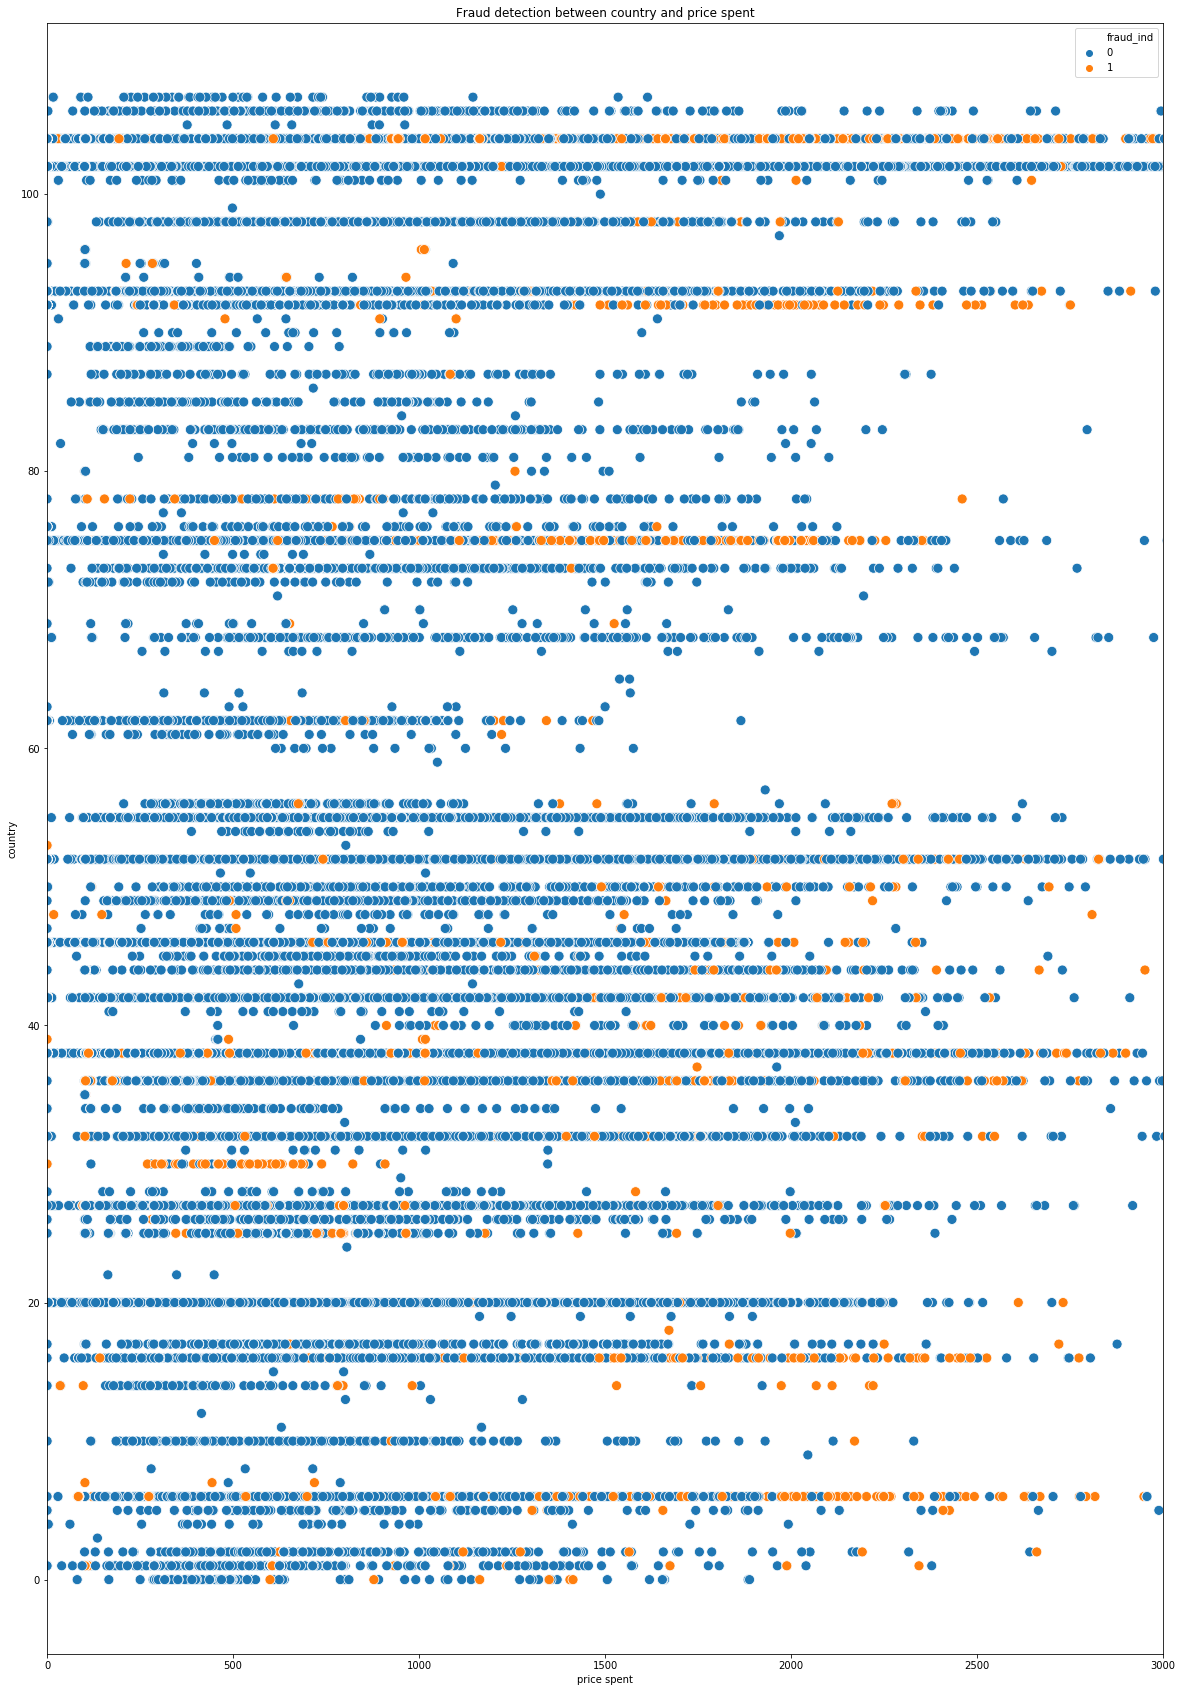

In [39]:
_ = sns.scatterplot(pro.conam, pro.stocn, hue=pro.fraud_ind, s=100);
fig = plt.gcf()
fig.set_size_inches(20,30)
plt.xlabel("price spent")
plt.ylabel("country")
plt.title("Fraud detection between country and price spent");
plt.xlim(0, 3000);

In [31]:
# fraudy.bacno.value_counts()

In [41]:
id_36103 = pro[pro.bacno==36103]
len(id_36103)

117

交易型態 支付型態 區別

In [42]:
pro.etymd.unique()

array([ 0,  2,  5,  4,  8,  1,  9,  6,  3,  7, 10])

In [43]:
pro.hcefg.unique()

array([5, 0, 3, 1, 2, 7, 8, 9, 6])

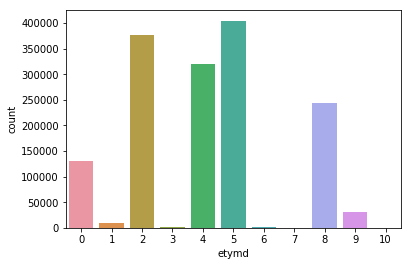

In [44]:
sns.countplot(pro.etymd)

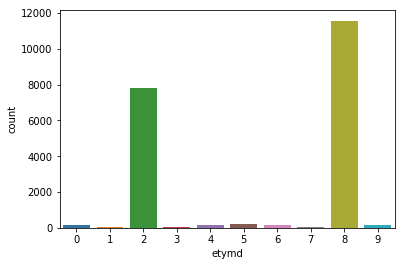

In [45]:
sns.countplot(fraudy.etymd)

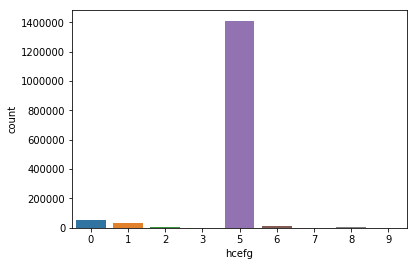

In [46]:
sns.countplot(pro.hcefg)

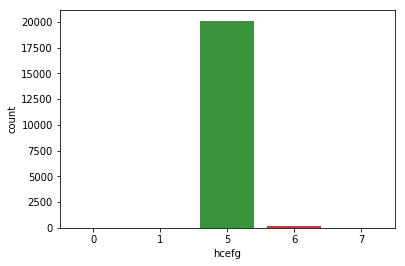

In [47]:
sns.countplot(fraudy.hcefg)

In [48]:
磁條交易 fallback VS ecfg

SyntaxError: invalid syntax (<ipython-input-48-6f45a9d36d4a>, line 1)

In [49]:
pro.flbmk.unique()

array(['N', 'Y', nan], dtype=object)

In [50]:
pro.flbmk.value_counts()

N    1504133
Y       5073
Name: flbmk, dtype: int64

In [51]:
fraudy.flbmk.value_counts()

N    20073
Y       87
Name: flbmk, dtype: int64

In [52]:
flg_3dsmk 簡訊交易

SyntaxError: invalid syntax (<ipython-input-52-6beca0fc84e8>, line 1)

In [53]:
pro.flg_3dsmk.unique()

array(['N', 'Y', nan], dtype=object)

In [54]:
pro.flg_3dsmk.value_counts()

N    1444867
Y      64339
Name: flg_3dsmk, dtype: int64

In [55]:
fraudy.flg_3dsmk.value_counts()

N    20060
Y      100
Name: flg_3dsmk, dtype: int64

In [56]:
pro.ovrlt.value_counts()

N    1501536
Y      20251
Name: ovrlt, dtype: int64

In [57]:
fraudy.ovrlt.value_counts()

N    19720
Y      635
Name: ovrlt, dtype: int64

Groupby country, city, money_spent, fraud

In [58]:
country = pd.DataFrame({'country':pro.stocn, 'city':pro.scity, 'money_spent':pro.conam, 'fraud':pro.fraud_ind})

In [59]:
country.head()

,country,city,money_spent,fraud
0,102,0,513.80,0
1,102,5817,465.62,0
2,102,0,513.80,0
3,102,3281,1016.11,0
4,102,5817,713.66,0


From the groupby we can realized that one city can belong to multi country

In [33]:
# country.groupby(['country', 'city'])['fraud'].sum().head(30)

By printing out the value counts of fraud in each city we can see that some city have extreme high percentage of fraud 

In [61]:
city = country.groupby(['city'])['fraud'].sum().sort_values(ascending=False)

If a city belong to multiple countries ranked it. percentage of total fraud in each cities

In [32]:
# (city / len(pro)).sort_values

I was first assuming that if a city show up under different countries, they must be fraud. but the result is not what I assumed. A city can belong to different country and have both fraud and non-fraud transcation. 

I am thinking about using the percentage of fraud to replace the city code???

In [34]:
# country[country.city==6580].sort_values('country')

In [35]:
# country[country.city==6580].sort_values('money_spent')

In [36]:
# country[country.city==6580]

In [66]:
country[country.city==3460].country.unique()

array([46])

In [67]:
country[country.city==6593].country.unique()

array([75])

In [68]:
country[country.city==0].country.unique()

array([102, 104,  52,  75,   1,  55,   2,  20,   6,  93,  42,  98,  32,
        50,  49,  25, 106,  54,  46,  45,  36,  68,  92,  60,  17, 101,
        38,  64,  77,  27,  73,  48,  16,   0,  26,  83,  88])

In [69]:
country[country.city==1337].country.unique()

array([104])

In [70]:
country[country.city==5817].country.unique()

array([102,  52])

In [71]:
country[(country.city==5817) & (country.country==102)].fraud.sum()

695

In [72]:
country.country.value_counts().head()

102    1313475
38       44311
46       41677
104      33496
75       20128
Name: country, dtype: int64

In [73]:
len(country[(country.city==5817) & (country.country==102)])

726391

In [74]:
len(country[(country.city==5817) & (country.country==52)])

55

In [75]:
country[(country.city==5817) & (country.country==52)].fraud.sum()

2

In [76]:
country[country.city==480].country.unique()

array([104])

In [77]:
fraudy[fraudy.scity==6580].head(10)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
4083,3348,62337,173073,0.00,5,62,Y,8,N,N,...,0,66,110626.0,380,54238,N,6580,38,0,749204
4420,3348,103187,104380,1016.34,5,62,Y,8,N,N,...,0,31,195752.0,380,54238,N,6580,38,0,691033
4714,6215,117283,180720,407.87,5,62,Y,2,N,N,...,0,56,225316.0,380,54238,N,6580,38,0,1893057
7583,3221,34824,130403,966.55,5,61,Y,8,N,N,...,0,32,10550.0,288,55807,N,6580,104,0,691474
7691,3221,22018,65232,101.02,5,61,Y,8,N,N,...,0,33,161735.0,288,55807,N,6580,104,0,694967
7712,6215,26537,124647,0.00,5,62,N,2,N,N,...,0,33,183430.0,380,54238,N,6580,38,0,1868001
8076,3348,70583,188016,1016.34,5,62,Y,8,N,N,...,0,32,195855.0,380,54238,N,6580,38,0,692930
8156,3348,66435,165560,407.87,5,62,Y,8,N,N,...,0,32,21305.0,380,54238,Y,6580,38,0,691620
8268,3221,9814,172985,942.55,5,61,Y,8,N,N,...,0,34,4721.0,288,55807,N,6580,104,0,696277
8506,6215,142638,118092,177.04,5,62,Y,2,N,N,...,0,32,12139.0,380,54238,N,6580,38,0,1865977


In [78]:
top_fraud_city = city.head(50)

In [79]:
top_fraud_city.sum()

16998

In [80]:
country_fraud = country[country.fraud==1]
#country_fraud

In [81]:
top_city_fraud = country_fraud.groupby(['city'])['fraud'].sum().sort_values(ascending=False).head(50)

In [82]:
fifty_city = list(top_city_fraud.index.values)
#fifty_city

In [83]:
for i in country_fraud.index:
    if country_fraud.city.loc[i] not in fifty_city:
        country_fraud = country_fraud.drop([i])

I now pick the top 50 fraud transaction cities and see if there are any pattern between the city and the amount of money

There indeed have some pattern like city 1337, that all the fraud transactions are within a certain amount of money spent. Q: If we really detailed the amount range for each city, I am worried about overfitting.

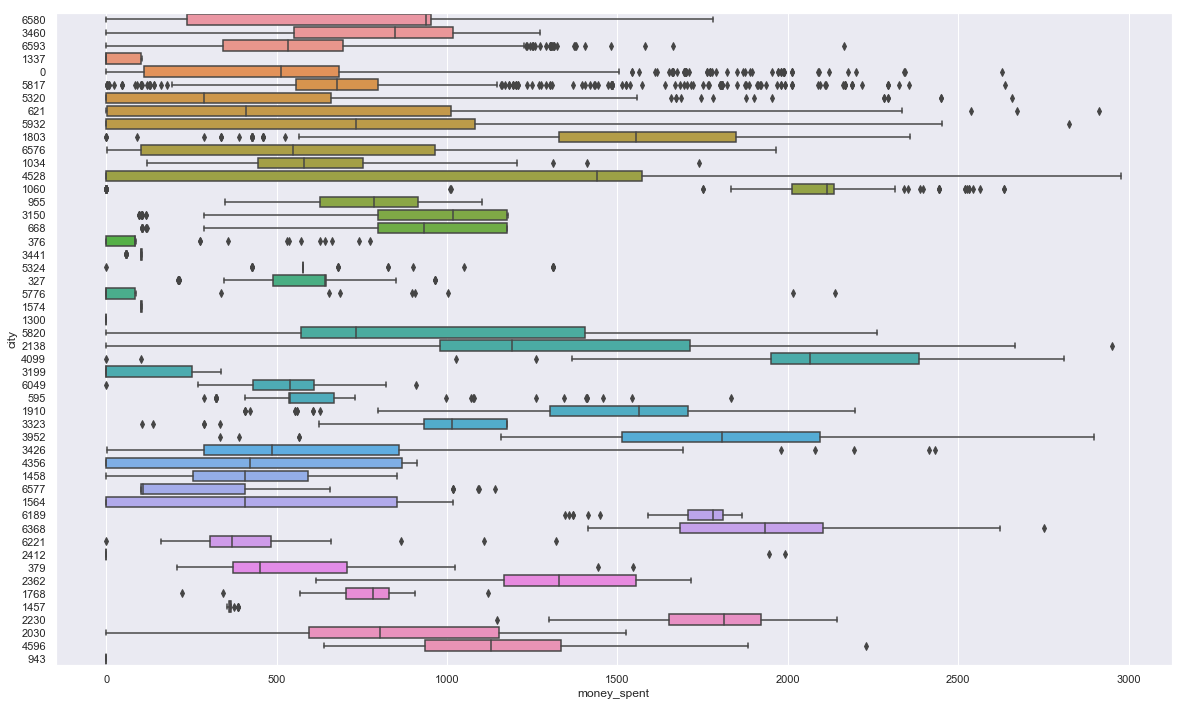

In [84]:
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(country_fraud.money_spent, country_fraud.city, orient='h', order=fifty_city)

Conclusion: Might can drop the country column since it really is distracting, the city column is more specialized and we might turn that column into a percentage column, cannot really find a pattern for fraud money spent yet.


average every ID, and a new column of 100%, if there is an amount greater than > 100% mark it and see if it belongs to the fraud transaction set

the most frequent fraud transaction ID, and see if there is any hidden variable

In [85]:
pro.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [37]:
# pro.groupby('bacno')['fraud_ind'].sum().sort_values(ascending=False)

In [87]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [40]:
# pro[pro.bacno==36103].sort_values('loctm')

In [38]:
# pro.conam.value_counts()

In [39]:
# fraudy.conam.value_counts()

cities with single countries:

In [170]:
country_city = country.groupby(['city','country'])['fraud'].sum()

In [41]:
# country_city

In [181]:
single_country = []
multi_country = []

for i in country_city.index.get_level_values(0).unique():
    if len(country_city[i].index) > 1:
        multi_country.append(i)
    else:
        single_country.append(i)

In [42]:
# country.head(100)

In [245]:
multi_country_fraud = []
for i in country.index:
    if country.city.iloc[i] in multi_country:
        multi_country_fraud.append(country.fraud.iloc[i])

In [248]:
single_country_fraud = []
for i in country.index:
    if country.city.iloc[i] in single_country:
        single_country_fraud.append(country.fraud.iloc[i])

In [246]:
sum(multi_country_fraud)

9931

In [247]:
sum(multi_country_fraud)/len(multi_country_fraud)

0.010546347752303661

In [249]:
sum(single_country_fraud)

10424

In [250]:
sum(single_country_fraud)/len(single_country_fraud)

0.017968262504869565

same amount of money spent too frequent in same sccount

In [280]:
pro.conam.value_counts().values

array([131026,  47667,  46373, ...,      1,      1,      1])

In [281]:
fraudy.conam.value_counts().values

array([2573, 1985,  405, ...,    1,    1,    1])

In [300]:
money_spent = pro.groupby(['conam'])['fraud_ind'].agg(['count','mean'])

In [43]:
# money_spent.sort_values('count',ascending=False).head(50)